<div style="margin: 0 auto; text-align: center; width: 500px;">
    <h1><font color='#7985E0'>UAS Machine Learning:</font></h1><h3><font color='#F29496'> Pokémon classification and SMOTE for imbalance</font></h3>
<div>

<div>
    <div style="margin: 0 auto; text-align: center; width: 500px;">
        <img src="https://drive.google.com/uc?id=1Y2Qa88dTnR80uhwDQ-qyMc3wye9CcMdx" alt="foto" style="width:250px; height:250px"><br>
        <b>
            <font color="#7985E0">
                Iman Mustika Ismail<br>
                H071201050<br>
                Kelas Machine Learning
            </font></b>
    </div>
</div>

---
<h2 style="text-align:center;"><font color='#B33A3A'><b>=== DISCLAIMER ===</b></font></h2><br>

Notebook ini adalah tugas pada matakuliah Machine Learning untuk memenuhi nilai UAS pada matakuliah tersebut, notebook ini merupakan hasil modifikasi dari notebook yang ada pada [Kaggle](Kaggle.com), berikut adalah sumber notebook dan dataset yang digunakan pada notebook ini.<br>
Original Notebook&nbsp;: [Pokémon classification and SMOTE for imbalance](https://www.kaggle.com/code/shrutimechlearn/pokemon-classification-and-smote-for-imbalance) by. Shruti_Iyyer<br>
Original Dataset &nbsp;&nbsp;&nbsp;&nbsp;: [Pokémon with stats](https://www.kaggle.com/datasets/abcsds/pokemon) by Alberto Barradas<br>
New Dataset &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: [Pokémon- Weedle's Cave](https://www.kaggle.com/datasets/terminus7/pokemon-challenge) by. T7 - HACKATHON CHALLENGE

---

<div>
    <div style="margin: 0 auto; text-align: center; width: 500px;">
        <img src="https://www.freepnglogos.com/uploads/pokemon-logo-png-0.png" alt="foto" style="width:500px; height:500px">
    </div>
</div>

# **Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pd_prof
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline


# **Initial EDA**

In [2]:
poke_data = pd.read_csv('pokemon.csv')

In [3]:
poke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


Initially only one column seems to have null values, 'Type 2'. Going by the data description it is the second column to depict the type of pokemon so it is acceptable to be null at some places because it is not necessary that every pokemon would have more than one type.

Column 'Total' is the Sum of Attack, Sp. Atk, Defense, Sp. Def, Speed and HP

In [4]:
poke_data.head()

#           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False

This # column seems to be useful as the index for this dataframe, Let's load the dataframe again with # as index

In [5]:
poke_data = pd.read_csv('pokemon.csv',index_col='#')

In [6]:
poke_data.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#                                                                               
1      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
2        Ivysaur  Grass  Poison  60      62       63       80       80     60   
3       Venusaur  Grass  Poison  80      82       83      100      100     80   
4  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
5     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  
#                         
1           1      False  
2           1      False  
3           1      False  
4           1      False  
5           1      False

Let's do a summary statistic analysis for the data

In [7]:
poke_data.describe()

HP      Attack     Defense     Sp. Atk     Sp. Def       Speed  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    69.258750   79.001250   73.842500   72.820000   71.902500   68.277500   
std     25.534669   32.457366   31.183501   32.722294   27.828916   29.060474   
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000   
25%     50.000000   55.000000   50.000000   49.750000   50.000000   45.000000   
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000   
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000   
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000   

       Generation  
count   800.00000  
mean      3.32375  
std       1.66129  
min       1.00000  
25%       2.00000  
50%       3.00000  
75%       5.00000  
max       6.00000

In [8]:
pd_prof.ProfileReport(poke_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We should replace the bool values in Legendary column with binary values

In [9]:
poke_data.Legendary.replace({True:1,False:0},inplace=True)

 Let's check now

In [10]:
poke_data.describe()

HP      Attack     Defense     Sp. Atk     Sp. Def       Speed  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    69.258750   79.001250   73.842500   72.820000   71.902500   68.277500   
std     25.534669   32.457366   31.183501   32.722294   27.828916   29.060474   
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000   
25%     50.000000   55.000000   50.000000   49.750000   50.000000   45.000000   
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000   
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000   
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000   

       Generation  Legendary  
count   800.00000  800.00000  
mean      3.32375    0.08125  
std       1.66129    0.27339  
min       1.00000    0.00000  
25%       2.00000    0.00000  
50%       3.00000    0.00000  
75%       5.00000    0.00000  
max       6.00000    1.00000

 No doubt the data would require to be scaled before modelling can take place. The max values of all columns are varying widely.<br>
 Apart from that none of the statistics seem to be unrealistic like negative values etc. so lets move forward.

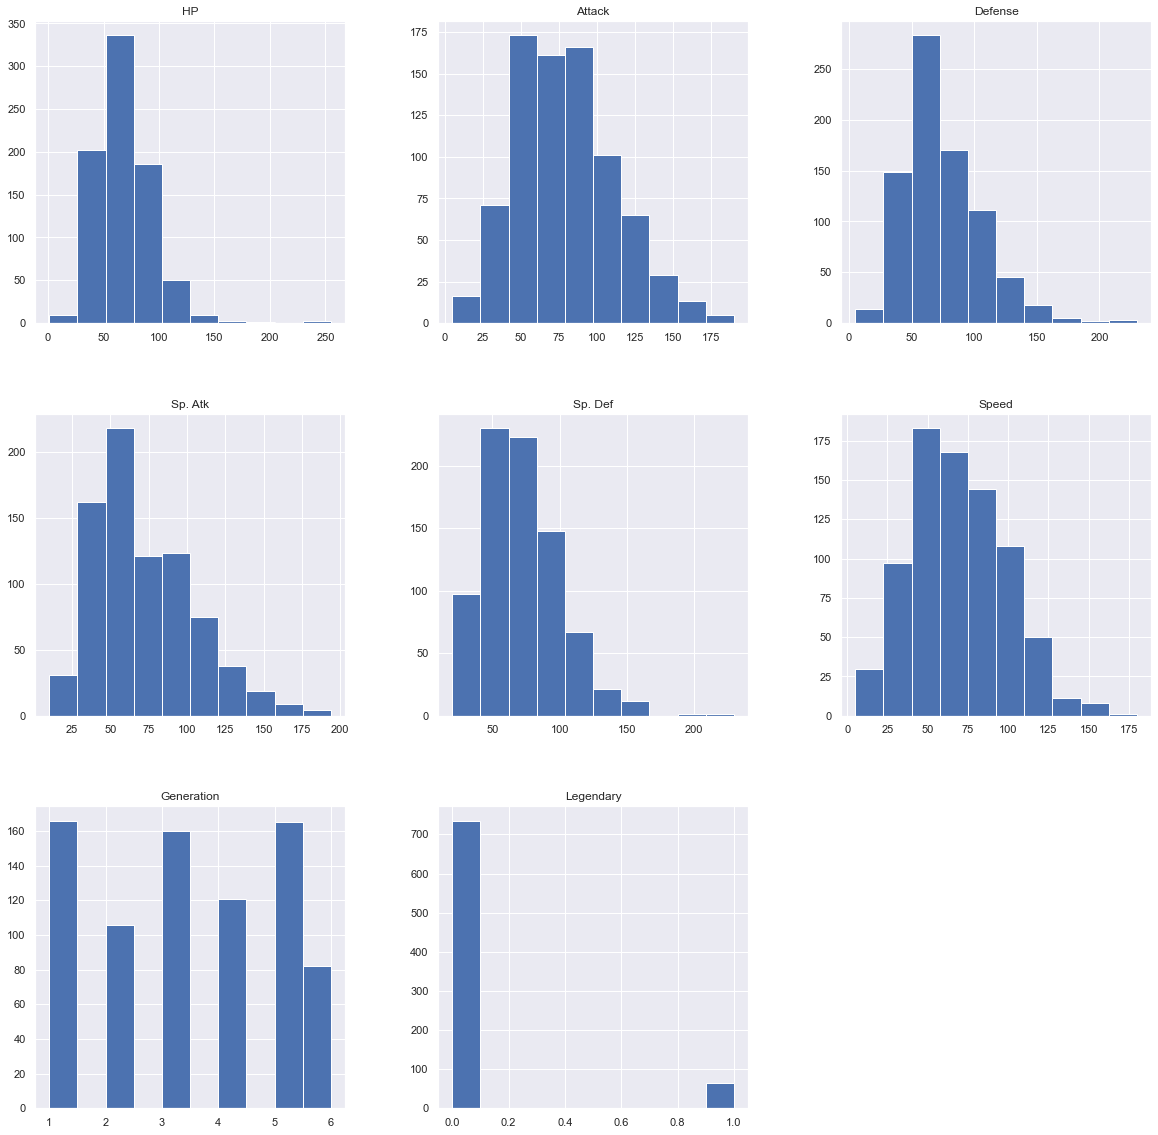

In [11]:
p = poke_data.hist(figsize = (20,20))

Some of the factors like Sp. Atk, Defence seem to be skewed.

 Skewness

A ***left-skewed distribution*** has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A ***right-skewed distribution*** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


<!-- ![](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg) -->


to learn more about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

## **Unique Values in each column**

In [12]:
poke_data['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

## **Great class imbalance!**

In [13]:
poke_data['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [14]:
poke_data['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

Two columns have the same categories. This may cause issues with one hot encoding. Let's try to solve for this. <br>
Beginning by checking what values the two columns contain and are they same.

In [15]:
type_1_list = list(poke_data['Type 1'].value_counts().index)
type_2_list = list(poke_data['Type 2'].value_counts().index)

In [16]:
type_1_list.sort()==type_2_list.sort()

True

This shows that the values in both the type columns are same. That means no column has a different category.

If get_dummies is directly applied to change this categorical data to binary, the function will produce columns with the same name because of the presence of same categories in both columns and due to the nature of get_dummies function. This would cause high dimensionality and unnecessary redundancy.<br>
To deal with this problem dummies of the two columns are created separately.

In [17]:
dummy_type_1 = pd.get_dummies(poke_data['Type 1'])
dummy_type_2 = pd.get_dummies(poke_data['Type 2'])

Now iterating on the name of the categories present in one of the columns (any one because both columns have same categories), the values of the columns having same name would be added together and stored in a third dataframe with the same index as the initial dataframe.

In [18]:
dummy_final = pd.DataFrame(index=poke_data.index)
for column_name in type_2_list:
    dummy_final[column_name] = dummy_type_1[column_name] + dummy_type_2[column_name]

In [19]:
dummy_final.head()

Bug  Dark  Dragon  Electric  Fairy  Fighting  Fire  Flying  Ghost  Grass  \
#                                                                             
1    0     0       0         0      0         0     0       0      0      1   
2    0     0       0         0      0         0     0       0      0      1   
3    0     0       0         0      0         0     0       0      0      1   
4    0     0       0         0      0         0     0       0      0      1   
5    0     0       0         0      0         0     1       0      0      0   

   Ground  Ice  Normal  Poison  Psychic  Rock  Steel  Water  
#                                                            
1       0    0       0       1        0     0      0      0  
2       0    0       0       1        0     0      0      0  
3       0    0       0       1        0     0      0      0  
4       0    0       0       1        0     0      0      0  
5       0    0       0       0        0     0      0      0

To check whether the steps we took are correct, summary stats are printed for the new dataframe. None of the columns contains a max value greater than one. Hence there's nothing to worry about.

In [20]:
dummy_final.describe()

Bug       Dark      Dragon    Electric       Fairy    Fighting  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean     0.090000    0.06375    0.062500    0.062500    0.050000    0.066250   
std      0.286361    0.24446    0.242213    0.242213    0.218081    0.248874   
min      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.00000    1.000000    1.000000    1.000000    1.000000   

             Fire      Flying       Ghost       Grass      Ground         Ice  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean     0.080000    0.126250    0.057500    0.118750    0.083750    0.047500   
std      0.271463    0.332339    0.232941    0.323696    0.277186    0.212839   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           Normal     Poison     Psychic        Rock       Steel       Water  
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000  
mean     0.127500    0.07750    0.112500    0.072500    0.061250    0.157500  
std      0.333741    0.26755    0.316178    0.259476    0.239938    0.364499  
min      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.00000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.00000    1.000000    1.000000    1.000000    1.000000

In [21]:
dummy_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Bug       800 non-null    uint8
 1   Dark      800 non-null    uint8
 2   Dragon    800 non-null    uint8
 3   Electric  800 non-null    uint8
 4   Fairy     800 non-null    uint8
 5   Fighting  800 non-null    uint8
 6   Fire      800 non-null    uint8
 7   Flying    800 non-null    uint8
 8   Ghost     800 non-null    uint8
 9   Grass     800 non-null    uint8
 10  Ground    800 non-null    uint8
 11  Ice       800 non-null    uint8
 12  Normal    800 non-null    uint8
 13  Poison    800 non-null    uint8
 14  Psychic   800 non-null    uint8
 15  Rock      800 non-null    uint8
 16  Steel     800 non-null    uint8
 17  Water     800 non-null    uint8
dtypes: uint8(18)
memory usage: 52.6 KB


By printing the info we can see that this new dataframe doesn't contain any Nan values whereas we had seen that the type 2 column had Nans. So what just happened? Where did the Nan values go?

Let's try to understand using a very raw example that I tried to depict below. 

In [22]:
# I have a dataframe 'df' like this 

# Id    v1    v2
# 0     A     0.23
# 1     B     0.65
# 2     NaN   0.87

# If I use this function

# df1 = get_dummies(df)
# df1

# Id    v1_A    v1_B    v2
# 0     1       0       0.23
# 1     0       1       0.65
# 2     0       0       0.87 .

So it is visible that get_dummies function converts Nans to 0 and doesn't form a separate column for them like it does for other categories. Our problem has been solved thanks to get_dummies()

Now we can concatenate this dataframe with the initial dataframe and drop the type 1 and type 2 columns

In [23]:
poke_data_new = pd.concat([poke_data,dummy_final],sort=False,axis=1)

Now let's do a basic check on this!

In [24]:
poke_data_new.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#                                                                               
1      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
2        Ivysaur  Grass  Poison  60      62       63       80       80     60   
3       Venusaur  Grass  Poison  80      82       83      100      100     80   
4  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
5     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  ...  Ghost  Grass  Ground  Ice  Normal  Poison  Psychic  Rock  \
#              ...                                                             
1           1  ...      0      1       0    0       0       1        0     0   
2           1  ...      0      1       0    0       0       1        0     0   
3           1  ...      0      1       0    0       0       1        0     0   
4           1  ...      0      1       0    0       0       1        0     0   
5           1  ...      0      0       0    0       0       0        0     0   

   Steel  Water  
#                
1      0      0  
2      0      0  
3      0      0  
4      0      0  
5      0      0  

[5 rows x 29 columns]

In [25]:
poke_data_new.drop(['Type 1','Type 2'],axis=1,inplace=True)
poke_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   HP          800 non-null    int64 
 2   Attack      800 non-null    int64 
 3   Defense     800 non-null    int64 
 4   Sp. Atk     800 non-null    int64 
 5   Sp. Def     800 non-null    int64 
 6   Speed       800 non-null    int64 
 7   Generation  800 non-null    int64 
 8   Legendary   800 non-null    int64 
 9   Bug         800 non-null    uint8 
 10  Dark        800 non-null    uint8 
 11  Dragon      800 non-null    uint8 
 12  Electric    800 non-null    uint8 
 13  Fairy       800 non-null    uint8 
 14  Fighting    800 non-null    uint8 
 15  Fire        800 non-null    uint8 
 16  Flying      800 non-null    uint8 
 17  Ghost       800 non-null    uint8 
 18  Grass       800 non-null    uint8 
 19  Ground      800 non-null    uint8 
 20  Ice       

Perfect we'll be using this one from now. 

Finally let's see the column Generation

In [26]:
poke_data_new['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

# **Bivariate EDA**

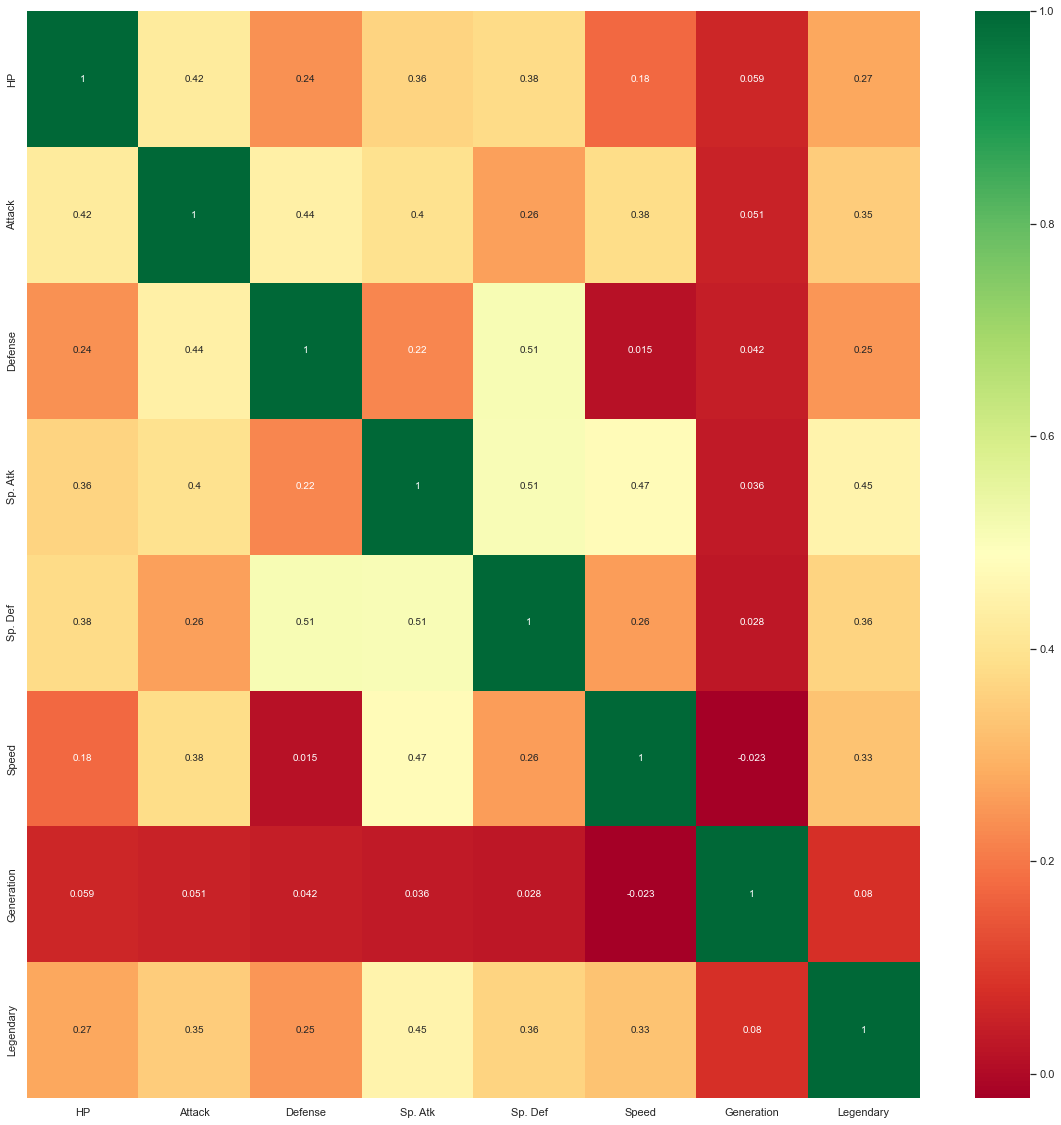

In [27]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(poke_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Noticable that none of the factors seem to have a correlation with the target value higher than 0.70

In [28]:
poke_data_new.columns

Index(['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary', 'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy',
       'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice',
       'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numerical =  pd.DataFrame(sc_X.fit_transform(poke_data_new[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]),columns=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],index= poke_data_new.index)

In [30]:
#numerical
poke_clean_standard = poke_data_new.copy(deep=True)
poke_clean_standard[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']] = numerical[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

In [31]:
poke_clean_standard.head()

Name        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  \
#                                                                              
1      Bulbasaur -0.950626 -0.924906 -0.797154 -0.239130 -0.248189 -0.801503   
2        Ivysaur -0.362822 -0.524130 -0.347917  0.219560  0.291156 -0.285015   
3       Venusaur  0.420917  0.092448  0.293849  0.831146  1.010283  0.403635   
4  Mega Venusaur  0.420917  0.647369  1.577381  1.503891  1.729409  0.403635   
5     Charmander -1.185748 -0.832419 -0.989683 -0.392027 -0.787533 -0.112853   

   Generation  Legendary  Bug  ...  Ghost  Grass  Ground  Ice  Normal  Poison  \
#                              ...                                              
1           1          0    0  ...      0      1       0    0       0       1   
2           1          0    0  ...      0      1       0    0       0       1   
3           1          0    0  ...      0      1       0    0       0       1   
4           1          0    0  ...      0      1       0    0       0       1   
5           1          0    0  ...      0      0       0    0       0       0   

   Psychic  Rock  Steel  Water  
#                               
1        0     0      0      0  
2        0     0      0      0  
3        0     0      0      0  
4        0     0      0      0  
5        0     0      0      0  

[5 rows x 27 columns]

In [32]:
poke_clean_standard.describe()

HP        Attack       Defense       Sp. Atk       Sp. Def  \
count  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   
mean  -2.660372e-16 -1.355860e-16  2.498002e-17  2.120526e-16 -1.171285e-16   
std    1.000626e+00  1.000626e+00  1.000626e+00  1.000626e+00  1.000626e+00   
min   -2.674852e+00 -2.281379e+00 -2.209039e+00 -1.920993e+00 -1.866223e+00   
25%   -7.546915e-01 -7.399327e-01 -7.650653e-01 -7.054650e-01 -7.875334e-01   
50%   -1.668874e-01 -1.233542e-01 -1.232993e-01 -2.391303e-01 -6.840691e-02   
75%    4.209167e-01  6.473688e-01  5.184667e-01  6.782494e-01  6.507196e-01   
max    7.278632e+00  3.421972e+00  5.010829e+00  3.705602e+00  5.684605e+00   

              Speed  Generation  Legendary         Bug       Dark  ...  \
count  8.000000e+02   800.00000  800.00000  800.000000  800.00000  ...   
mean  -7.842685e-17     3.32375    0.08125    0.090000    0.06375  ...   
std    1.000626e+00     1.66129    0.27339    0.286361    0.24446  ...   
min   -2.178804e+00     1.00000    0.00000    0.000000    0.00000  ...   
25%   -8.015032e-01     2.00000    0.00000    0.000000    0.00000  ...   
50%   -1.128526e-01     3.00000    0.00000    0.000000    0.00000  ...   
75%    7.479606e-01     5.00000    0.00000    0.000000    0.00000  ...   
max    3.846888e+00     6.00000    1.00000    1.000000    1.00000  ...   

            Ghost       Grass      Ground         Ice      Normal     Poison  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.00000   
mean     0.057500    0.118750    0.083750    0.047500    0.127500    0.07750   
std      0.232941    0.323696    0.277186    0.212839    0.333741    0.26755   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.00000   

          Psychic        Rock       Steel       Water  
count  800.000000  800.000000  800.000000  800.000000  
mean     0.112500    0.072500    0.061250    0.157500  
std      0.316178    0.259476    0.239938    0.364499  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 26 columns]

In [33]:
x = poke_clean_standard.drop(["Legendary","Name"],axis=1)
y = poke_clean_standard.Legendary

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 2,test_size=0.4,stratify=y)

In [35]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [36]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [37]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))


Max test score 95.3125 % and k = [5, 7]


## **Result visualisation**

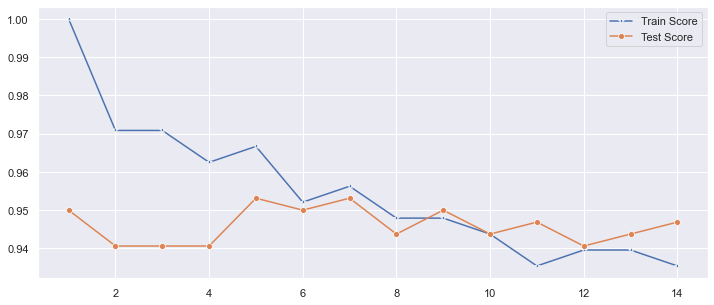

In [38]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')


The best result is captured at k = 5 and k = 7 hence 5 and 7 is used for the final model 

In [39]:
#Setup a knn classifier with k neighbors
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(7)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.953125

## **Confusion Matrix**

In [40]:
y_pred = knn.predict(X_test)

Text(0.5, 12.5, 'Predicted label')

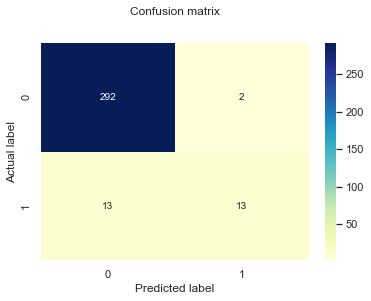

In [41]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **F1 Score**

In [42]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.6341463414634146

## **Classification Report**

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       294
           1       0.87      0.50      0.63        26

    accuracy                           0.95       320
   macro avg       0.91      0.75      0.80       320
weighted avg       0.95      0.95      0.95       320



## **Matthew Correlation Coefficient Score**

In [44]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test,y_pred))

0.6375077398431428


## **ROC Curve**

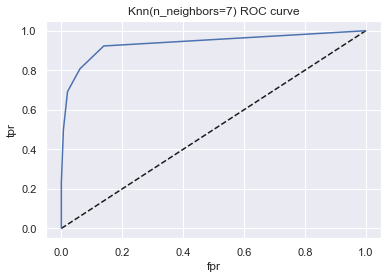

In [45]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

# **SMOTE for Class Imbalance**

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
poke_clean_standard.Legendary.value_counts()

0    735
1     65
Name: Legendary, dtype: int64

In [48]:
sm = SMOTE(random_state=2, sampling_strategy='minority')
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [49]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train_res,y_train_res)
    
    train_scores.append(knn.score(x_train_res,y_train_res))
    test_scores.append(knn.score(X_test,y_test))

In [50]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1, 2]


In [51]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 92.1875 % and k = [2]


In [52]:
knn = KNeighborsClassifier(2)

knn.fit(x_train_res,y_train_res)
knn.score(X_test,y_test)

0.921875

In [53]:
y_pred = knn.predict(X_test)

Text(0.5, 12.5, 'Predicted label')

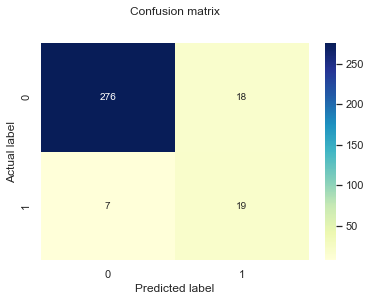

In [54]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.6031746031746031

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       294
           1       0.51      0.73      0.60        26

    accuracy                           0.92       320
   macro avg       0.74      0.83      0.78       320
weighted avg       0.94      0.92      0.93       320



In [57]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test,y_pred))

0.572065638762842


# **SMOTE Tomek Method**

In [58]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
x_train_res, y_train_res = smt.fit_resample(X_train, y_train)


In [59]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train_res,y_train_res)
    
    train_scores.append(knn.score(x_train_res,y_train_res))
    test_scores.append(knn.score(X_test,y_test))

In [60]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1, 2]


In [61]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 93.125 % and k = [2]


In [62]:
knn = KNeighborsClassifier(2)

knn.fit(x_train_res,y_train_res)
knn.score(X_test,y_test)

0.93125

In [63]:
y_pred = knn.predict(X_test)

Text(0.5, 12.5, 'Predicted label')

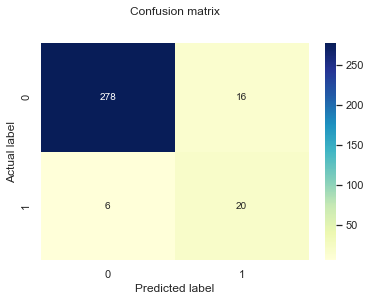

In [64]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.6451612903225806

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       294
           1       0.56      0.77      0.65        26

    accuracy                           0.93       320
   macro avg       0.77      0.86      0.80       320
weighted avg       0.94      0.93      0.94       320



In [67]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test,y_pred))

0.6180732260818462
